In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, f1_score, auc, roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from astropy.io import ascii
from utils import col_names, relevant_indices, normalise_sdss_class
random_state=1

In [131]:
datasets = "../datasets/SuperCOSMOS/"
img_path = "/home/phil/Dropbox/Apps/Overleaf/DME SSS Project Final/img/"

In [132]:
%%time
uki823_df = ascii.read(datasets + "UKI823/sssedrpair.dat").to_pandas()
# ukr823_df = ascii.read(datasets + "UKR823/sssedrpair.dat").to_pandas()
# ukj823_df = ascii.read(datasets + "UKJ823/sssedrpair.dat").to_pandas()

CPU times: user 847 ms, sys: 18.7 ms, total: 866 ms
Wall time: 863 ms


In [133]:
uki823_df.columns = col_names
normalise_sdss_class(uki823_df)
# uki823_rel_df = uki823_df.iloc[:, relevant_indices]

X_raw = uki823_df
yy = uki823_df['CLASS_SDSS']

# 70, 20, 10
X_temp, X_raw_test, yy_temp, yy_test = train_test_split(X_raw, yy, test_size=0.1, random_state=random_state)
#22% of 90% = 20%
X_raw_train, X_raw_val, yy_train, yy_val = train_test_split(X_temp, yy_temp, test_size=0.22, random_state=random_state)

uki823_df = X_raw_train

In [134]:
# np.unique(uki823_df[['CLASS', 'CLASS_SDSS']])
# normalise_sdss_class(uki823_df)
matrix_full = confusion_matrix(uki823_df['CLASS'], uki823_df['CLASS_SDSS'])
# matrix_true = matrix_full[:2,:2]
# matrix_incorrect = matrix_full[2:,:2]
# matrix_full[:2]

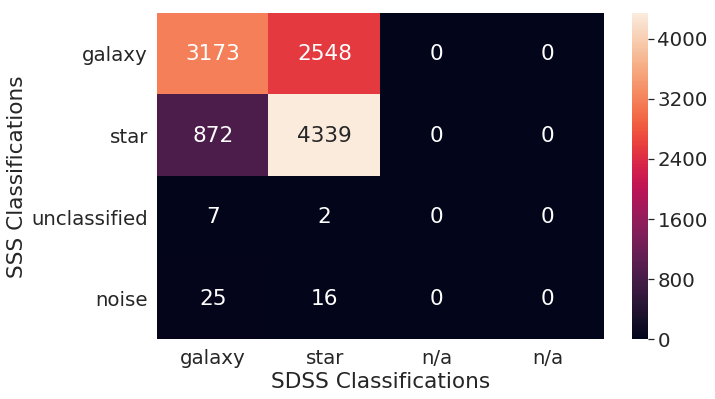

In [141]:
matrix_df = pd.DataFrame(matrix_full, index=["galaxy","star","unclassified","noise"], columns=["galaxy","star","n/a","n/a"])
sn.set(font_scale=1.8)
plt.figure(figsize = (10,6))
sn.heatmap(matrix_df, annot=True, fmt='g')
plt.xlabel("SDSS Classifications")
plt.ylabel("SSS Classifications")
plt.savefig(img_path + "sdss-sss-classification-confusion-matrix.pdf", format='pdf', bbox_inches='tight', dpi=1200)

Text(0.5, 1.0, 'ROC Curve for SSS Classifications')

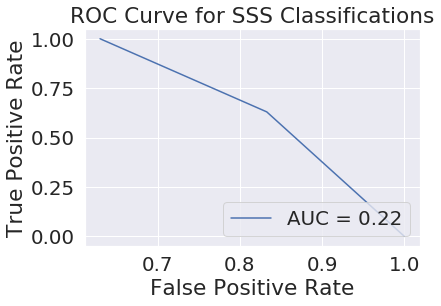

In [136]:
uki823_final = uki823_df[uki823_df.CLASS.isin([1,2])]

false_pos, true_pos, thresh = precision_recall_curve(np.array(uki823_final['CLASS_SDSS']), np.array(uki823_final['CLASS']), pos_label=2)
roc_auc = auc(false_pos, true_pos)
plt.plot(false_pos, true_pos, label='AUC = %0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for SSS Classifications")

In [137]:
len(np.array(uki823_final['CLASS']))
pd.Series(uki823_final['CLASS']).unique()

array([2, 1])

In [140]:
val = 2
prec = precision_score(uki823_final['CLASS_SDSS'], uki823_final['CLASS'], pos_label=val)
rec = recall_score(uki823_final['CLASS_SDSS'], uki823_final['CLASS'], pos_label=val)
f1 = f1_score(uki823_final['CLASS_SDSS'], uki823_final['CLASS'], pos_label=val)
acc = accuracy_score(uki823_final['CLASS_SDSS'], uki823_final['CLASS'])
(prec, rec, f1, acc)

(0.8326616772212627,
 0.6300275882096704,
 0.7173086460571997,
 0.6871569703622393)